In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("cleaned.csv")

In [3]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,No address,NYC,NY,10022,USA,Earth,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,No address,Reims,No State,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,No address,Paris,No State,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,No address,Pasadena,CA,90003,USA,Earth,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,No address,San Francisco,CA,00000,USA,Earth,Brown,Julie,Medium


In [4]:
data.loc[data["TERRITORY"]=="Earth","TERRITORY"]="AMER"

In [5]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,No address,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,No address,Reims,No State,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,No address,Paris,No State,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,No address,Pasadena,CA,90003,USA,AMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,No address,San Francisco,CA,00000,USA,AMER,Brown,Julie,Medium


In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11732\2727941655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= region_sales.index,y=region_sales.values,palette="viridis")


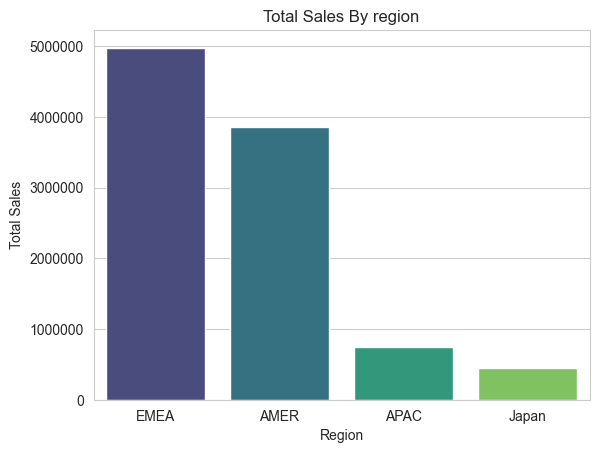

In [7]:
region_sales =data.groupby("TERRITORY")["SALES"].sum().sort_values(ascending=False)
sns.barplot(x= region_sales.index,y=region_sales.values,palette="viridis")
plt.title("Total Sales By region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.ticklabel_format(style="plain",axis="y")
plt.savefig("Total sales by Region.jpg")
plt.show()

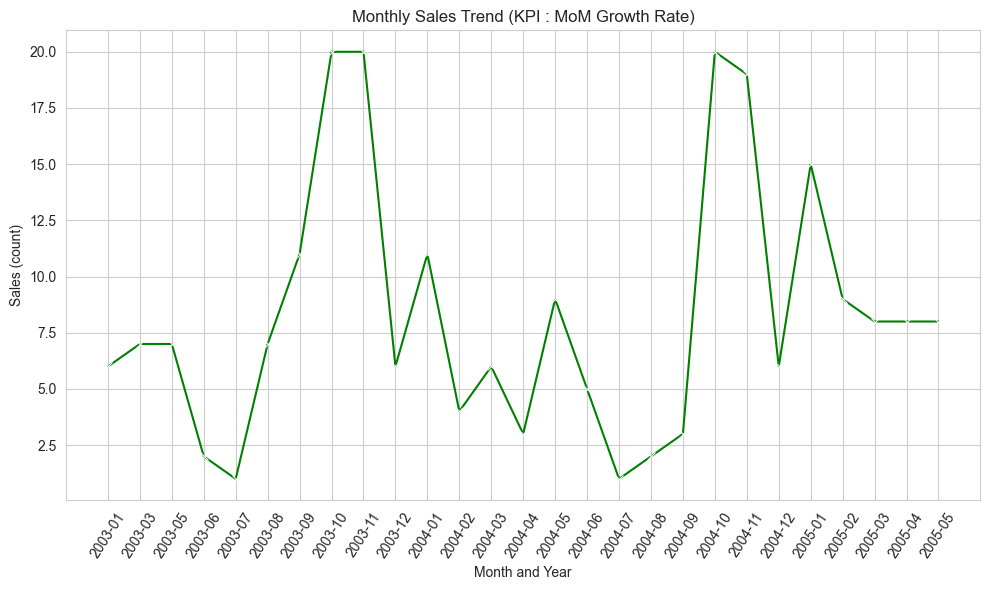

In [8]:
data["ORDERDATE"] = pd.to_datetime(data["ORDERDATE"],errors="coerce")
monthly_sales = data[(data["PRODUCTLINE"] == "Vintage Cars") & (data["COUNTRY"] == "USA")].groupby(data["ORDERDATE"].dt.to_period("M"))["SALES"].count()
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_sales.index.astype(str),y=monthly_sales.values,marker="x",color="green")
plt.title("Monthly Sales Trend (KPI : MoM Growth Rate)")
plt.ylabel("Sales (count)")
plt.xlabel("Month and Year")
plt.xticks(rotation=57)
plt.tight_layout()
plt.savefig('Day4_MoM Sales on Vintage Cars only on USA.jpg')
plt.show()

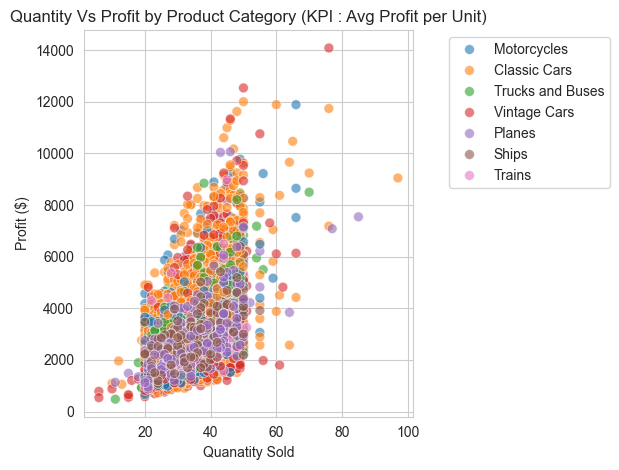

In [12]:
sns.scatterplot(data= data,x="QUANTITYORDERED",y="SALES",hue="PRODUCTLINE",alpha=0.6,s=50)
plt.title("Quantity Vs Profit by Product Category (KPI : Avg Profit per Unit)")
plt.xlabel("Quanatity Sold")
plt.ylabel("Profit ($)")
plt.legend(bbox_to_anchor=(1.09,1),loc="upper left")
plt.tight_layout()
plt.savefig("Quantity_vs_Profit for all markets.jpg")

plt.show()